In [ ]:
#!pip install ipdb

In [3]:
import os
import ipdb
from util import (
    prepare_dataset,
    build_model,
    train,
    plot_history,
    plot_confusion_matrix,
    TRAIN_DATA_PATH,
    TEST_DATA_PATH,
    BATCH_SIZE,
    PATIENCE,
    SAVED_MODEL_PATH, 
    SAVED_JS_MODEL_PATH,
    LEARNING_RATE,
    EPOCHS,
    LABELS
)
import librosa
import numpy as np
import prepare_dataset as adprep
import IPython
import tensorflow as tf
import tensorflowjs as tfjs
from split_dataset import create_test_split


# You should only do this once!
CREATE_TEST_SPLIT = False


if CREATE_TEST_SPLIT:
    create_test_split()



DO_TRAIN_DATA_AUGMENTATION = False
SAMPLES_TO_CONSIDER = 22050

# IPython.display.Audio("my_audio_file.mp3")

In [ ]:
def train_model():
    

    X_train, y_train, X_validation, y_validation = prepare_dataset(TRAIN_DATA_PATH)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape, learning_rate=LEARNING_RATE)

    # train network
    history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

    # plot accuracy/loss for training/validation set as a function of the epochs
    plot_history(history)

    
    # save model
    model.save(SAVED_MODEL_PATH)
    tfjs.converters.save_keras_model(model, SAVED_JS_MODEL_PATH)
    return model

In [ ]:


if DO_TRAIN_DATA_AUGMENTATION:
    # To prevent augemnting already augmented files
    adprep.remove_augmented_files(adprep.TRAIN_DATASET_PATH)
    adprep.augment_dataset(adprep.TRAIN_DATASET_PATH)

adprep.preprocess_dataset(adprep.TRAIN_DATASET_PATH, adprep.TRAIN_JSON_PATH, "Train")


In [ ]:
adprep.convert_to_wav_dataset(adprep.TESTING_DATASET_PATH)
adprep.preprocess_dataset(adprep.TESTING_DATASET_PATH, adprep.TESTING_JSON_PATH, "Test")



In [ ]:
model = train_model()

In [4]:
def test_model(model=None, load_model=True):
    
    X_test, y_test = prepare_dataset(TEST_DATA_PATH, test_only=True)
    
    # create network
    input_shape = (X_test.shape[1], X_test.shape[2], 1)
    
    if load_model and model == None:
        print("Loading Saved Model")
        model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    
    plot_confusion_matrix(
        X_test,
        y_test,
        model
    )

    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))
    
    y_pred = model.predict(X_test)
    rounded_predictions = np.argmax(y_pred, axis=1)
    print("Labels:", LABELS)
    gt_labels =  [LABELS[x] for x in y_test]
    predictions = [LABELS[x] for x in rounded_predictions]
    
    for gt, pred in zip(gt_labels, predictions):
        print("GT:", gt, "Prediction:", pred)
    
    #ipdb.set_trace()

    return model

Testing sets loaded!
Loading Saved Model


2022-02-15 18:52:55.116979: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


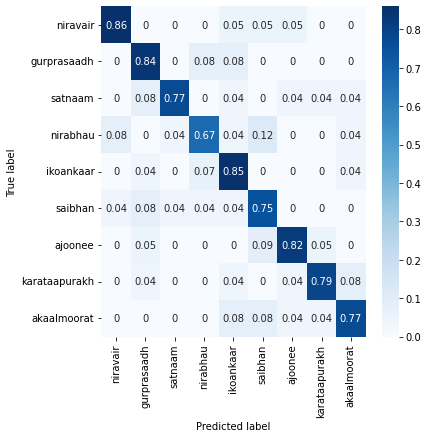

7/7 [==============================] - 0s 8ms/step - loss: 0.9999 - accuracy: 0.7909

Test loss: 0.9999058246612549, test accuracy: 79.09091114997864
Labels: ['niravair', 'gurprasaadh', 'satnaam', 'nirabhau', 'ikoankaar', 'saibhan', 'ajoonee', 'karataapurakh', 'akaalmoorat']
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: ikoankaar
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: niravair
GT: niravair Prediction: saibhan
GT: niravair Prediction: niravair
GT: niravair Prediction: ajoonee
GT: niravair Prediction: niravair
GT: niravai

In [5]:
model = test_model(load_model=True)

In [7]:
def test_single_file(file_path, model):

    processed_audio = adprep.preprocess_single_file(file_path)
    
    output_vector = model.predict(processed_audio)
    predict_label_id = np.argmax(output_vector, axis=1)
    return LABELS[predict_label_id[0]]
        

In [8]:
test_single_file("testing_dataset/ajoonee/Ajooni_20Bhupy.wav", model)

'ajoonee'